In [6]:
from data_processing.dataset import load_dataset
from data_processing.obj2py import read_get

In [2]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import vtk
from vtk.util.numpy_support import vtk_to_numpy
from tqdm import tqdm
from scipy.optimize import minimize
from vedo import *
import meshio
import seaborn as sns
import pyvista as pv
from data_processing.mesh_to_array import *
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Define the discrete values and corresponding grayscale values
values = [0, 1, 2, 3, 4, 5]
grayscale_values = np.linspace(0, 1, len(values))  # Grayscale values range from 0 to 1

# Create a colormap dictionary
colormap_dict = {}
for value, grayscale_value in zip(values, grayscale_values):
    colormap_dict[value] = grayscale_value

# Create a LinearSegmentedColormap object
cmap = LinearSegmentedColormap.from_list('custom_colormap', [(val, val, val) for val in grayscale_values], N=len(values))


In [12]:
import pandas as pd

In [17]:
pd.read_csv('/home/nibdombe/deep_eit/data/raw/case_TCIA_183_0/electrodes/electrodes.txt', sep=' ', header=None).values

array([[-0.40563376, -0.28184229,  0.12082404],
       [-0.35617447, -0.27693008,  0.11945236],
       [-0.30478505, -0.25623117,  0.12099603],
       [-0.25847588, -0.22816812,  0.12022726],
       [-0.25912225, -0.17893843,  0.11972742],
       [-0.29070746, -0.13566435,  0.12040378],
       [-0.32399998, -0.09743378,  0.11983923],
       [-0.37781335, -0.08984384,  0.11930533],
       [-0.43260832, -0.09216021,  0.1192261 ],
       [-0.49109106, -0.09384572,  0.12049023],
       [-0.54212051, -0.10358374,  0.11949515],
       [-0.57426233, -0.14393279,  0.12009137],
       [-0.56311472, -0.19892288,  0.11905103],
       [-0.55171164, -0.25471683,  0.12079578],
       [-0.51644211, -0.29088107,  0.11909091],
       [-0.46175993, -0.29304617,  0.12092621],
       [-0.41450688, -0.29203336,  0.06933328],
       [-0.35198437, -0.2857915 ,  0.06965637],
       [-0.29957623, -0.26469611,  0.07009918],
       [-0.25686413, -0.23089059,  0.06972015],
       [-0.26155104, -0.18270984,  0.069

In [24]:
electrodes = pd.read_csv('/home/nibdombe/deep_eit/data/raw/case_TCIA_2_0/electrodes/electrodes.txt', sep=' ', header=None).values
electrodes = electrodes * [-1, -1, 1]


In [25]:
electrodes.shape

(65, 3)

In [ ]:
# electrodes
electrodes_path = os.path.join(folder, 'electrodes', 'electrodes.txt')
os.makedirs(os.path.join(folder, 'electrodes','old_mirrored'), exist_ok=True)
electrodes = pd.read_csv(electrodes_path, sep=" ", header=None)
os.rename(electrodes_path, os.path.join(folder, 'electrodes', 'old_mirrored', 'electrodes.txt'))
electrodes = electrodes * [-1, -1, 1]
electrodes = electrodes.reshape(-1, 16, 3)
for i, e in enumerate(electrodes):
    electrodes[i] = e[converting_list]
np.savetxt(electrodes_path, electrodes, fmt='%f')

In [2]:
electrodes_path = '/Users/dmnk/Documents/GitHub/KI_EIT/deep_eit/data/raw/case_15/electrodes/case_TCIA_200_0_elecs16_65.txt'
mesh_path = '/Users/dmnk/Documents/GitHub/KI_EIT/deep_eit/data/raw/case_15/labels/case_TCIA_200_0_final_mesh.vtk'

In [3]:
coords = pd.read_csv(electrodes_path, sep=" ", header=None).values[:-1]

In [4]:
coords = coords.reshape(-1, 16, 3)
coords

array([[[0.2126196 , 0.09444195, 0.56054224],
        [0.26826318, 0.08978139, 0.56047745],
        [0.32557748, 0.08815749, 0.55969781],
        [0.37123636, 0.11932329, 0.56048654],
        [0.38855222, 0.16887984, 0.55982056],
        [0.35740396, 0.21735344, 0.56091248],
        [0.34171054, 0.25933405, 0.56051093],
        [0.27990723, 0.2763819 , 0.56045316],
        [0.22175301, 0.26893704, 0.5597579 ],
        [0.16707253, 0.28363953, 0.55951855],
        [0.11262929, 0.27972043, 0.55916422],
        [0.08234306, 0.23652477, 0.55979581],
        [0.06003391, 0.18723218, 0.55919962],
        [0.06312871, 0.13313249, 0.5590661 ],
        [0.10237038, 0.0971731 , 0.55983456],
        [0.15807362, 0.08974492, 0.56027258]],

       [[0.21139037, 0.09135496, 0.50983936],
        [0.26310458, 0.09007947, 0.50986374],
        [0.31903903, 0.09344113, 0.50945551],
        [0.36305557, 0.12048524, 0.51041373],
        [0.37290405, 0.17442168, 0.51073636],
        [0.36358759, 0.22667314,

In [5]:
z_coords = np.mean(coords, axis=1)[:,2]
z_coords

array([0.55996941, 0.51023629, 0.45999656, 0.41000972])

In [6]:
mesh

<module 'vedo.mesh' from '/opt/homebrew/Caskroom/miniforge/base/envs/deep_eit/lib/python3.12/site-packages/vedo/mesh.py'>

In [7]:
images = []
masks = []
mesh_in = pv.read(mesh_path)
for z in tqdm(z_coords):
    img = mesh_to_image(mesh_in, z_pos=z, return_mask=False)
    images.append(img)
    masks.append(np.where(img>0, 1, 0))

  0%|          | 0/4 [00:00<?, ?it/s]

box_size set to 0.0034125.


 25%|██▌       | 1/4 [00:13<00:40, 13.66s/it]

box_size set to 0.0034125.


 50%|█████     | 2/4 [00:27<00:26, 13.49s/it]

box_size set to 0.0034125.


 75%|███████▌  | 3/4 [00:39<00:13, 13.20s/it]

box_size set to 0.0034125.


100%|██████████| 4/4 [00:52<00:00, 13.24s/it]


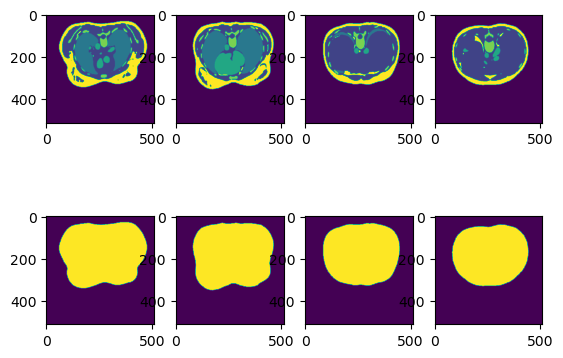

In [8]:
fig, axes = plt.subplots(2, 4)

for i in range(4):
    axes[0, i].imshow(images[i])
    axes[1, i].imshow(masks[i])

In [9]:
pv_mesh = pv.read('/Users/dmnk/Documents/GitHub/KI_EIT/deep_eit/data/raw/case_15/labels/case_TCIA_200_0_final_mesh.vtk')

In [10]:
celldata_name = pv_mesh.cell_data.keys()[0]
pv_mesh.cell_data['PartId'] = pv_mesh.cell_data[celldata_name]

In [11]:
pv_mesh

UnstructuredGrid (0x2b22ce920)
  N Cells:    10898285
  N Points:   1940540
  X Bounds:   2.844e-03, 4.152e-01
  Y Bounds:   6.866e-02, 3.936e-01
  Z Bounds:   6.250e-02, 7.450e-01
  N Arrays:   2

In [16]:
z = z_coords[-1]

In [19]:
xmin, xmax = pv_mesh.bounds[:2]
ymin, ymax = pv_mesh.bounds[2:4]
zmin, zmax = pv_mesh.bounds[4:6]
zmean = np.mean(np.array([zmax,zmin]))
xmean = np.mean(np.array([xmax,xmin]))
ymean = np.mean(np.array([ymax,ymin]))

In [47]:
coords

array([[[0.2126196 , 0.09444195, 0.56054224],
        [0.26826318, 0.08978139, 0.56047745],
        [0.32557748, 0.08815749, 0.55969781],
        [0.37123636, 0.11932329, 0.56048654],
        [0.38855222, 0.16887984, 0.55982056],
        [0.35740396, 0.21735344, 0.56091248],
        [0.34171054, 0.25933405, 0.56051093],
        [0.27990723, 0.2763819 , 0.56045316],
        [0.22175301, 0.26893704, 0.5597579 ],
        [0.16707253, 0.28363953, 0.55951855],
        [0.11262929, 0.27972043, 0.55916422],
        [0.08234306, 0.23652477, 0.55979581],
        [0.06003391, 0.18723218, 0.55919962],
        [0.06312871, 0.13313249, 0.5590661 ],
        [0.10237038, 0.0971731 , 0.55983456],
        [0.15807362, 0.08974492, 0.56027258]],

       [[0.21139037, 0.09135496, 0.50983936],
        [0.26310458, 0.09007947, 0.50986374],
        [0.31903903, 0.09344113, 0.50945551],
        [0.36305557, 0.12048524, 0.51041373],
        [0.37290405, 0.17442168, 0.51073636],
        [0.36358759, 0.22667314,

In [43]:
points = []
box_size=0.001
mesh_clipped = []
for z in z_coords:
    c_mesh = pv_mesh.clip_box([xmin, xmax, ymin, ymax, z-box_size, z+box_size], invert=False)
    c_mesh.cell_data['PartId'] = np.ones_like(c_mesh.cell_data['PartId'])+6
    mesh_clipped.append(c_mesh)
    max_point = np.argmax(c_mesh.points[:,1])
    # points.append(np.array([xmax, ymax, z]))
    points.append(c_mesh.points[max_point])



/opt/homebrew/Caskroom/miniforge/base/envs/deep_eit/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


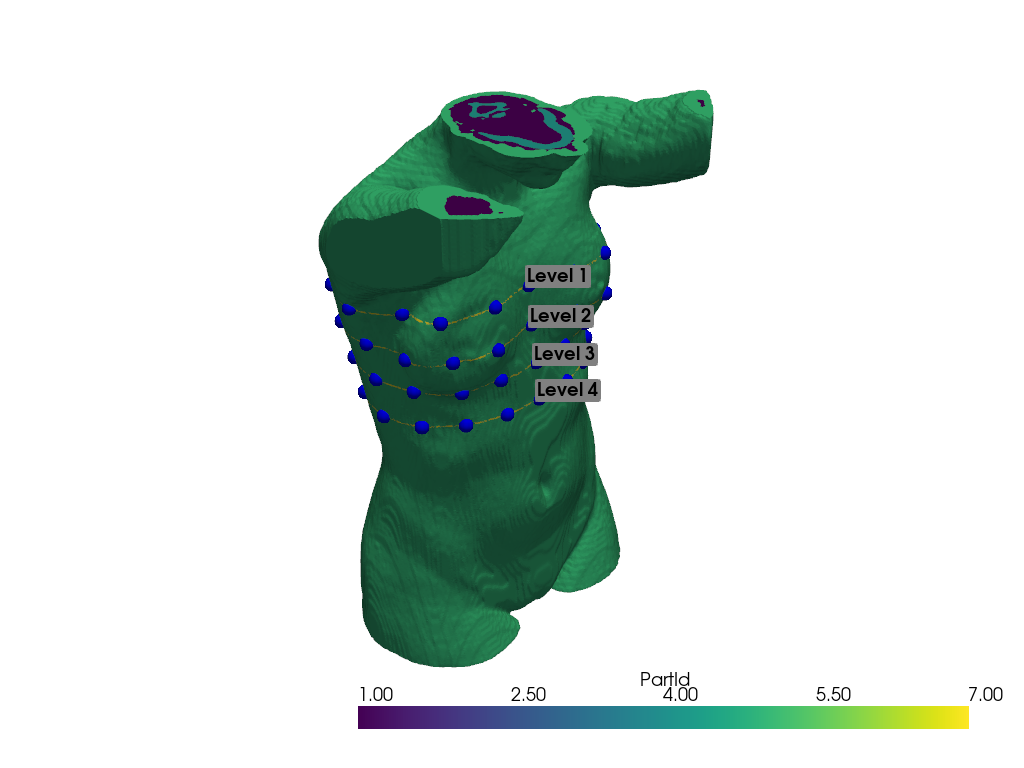

In [52]:
p = pv.Plotter()
p.add_mesh(pv_mesh)
for i, point in enumerate(points):
    # p.add_point_labels([point], [f'Level {i+1}'],always_visible=True)
    # p.add_points(point, color='r', render_points_as_spheres=True, point_size=25)
    p.add_mesh(mesh_clipped[i])
for i, c in enumerate(coords):
    p.add_point_labels(c[-8], [f'Level {i+1}'],always_visible=True)
    for e in c:
        p.add_points(e, color='blue', render_points_as_spheres=True, point_size=15)
p.show()

In [51]:
coords.shape

(4, 16, 3)

In [36]:
pv_mesh_clipped = pv_mesh.clip_box([xmin, xmax, ymin, ymax, zmean-0.01, zmean+0.01], invert=False)

In [37]:
pv_mesh_clipped

UnstructuredGrid (0x28afbbdc0)
  N Cells:    345719
  N Points:   93958
  X Bounds:   6.626e-02, 3.603e-01
  Y Bounds:   9.380e-02, 2.824e-01
  Z Bounds:   3.875e-01, 4.208e-01
  N Arrays:   2

/opt/homebrew/Caskroom/miniforge/base/envs/deep_eit/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


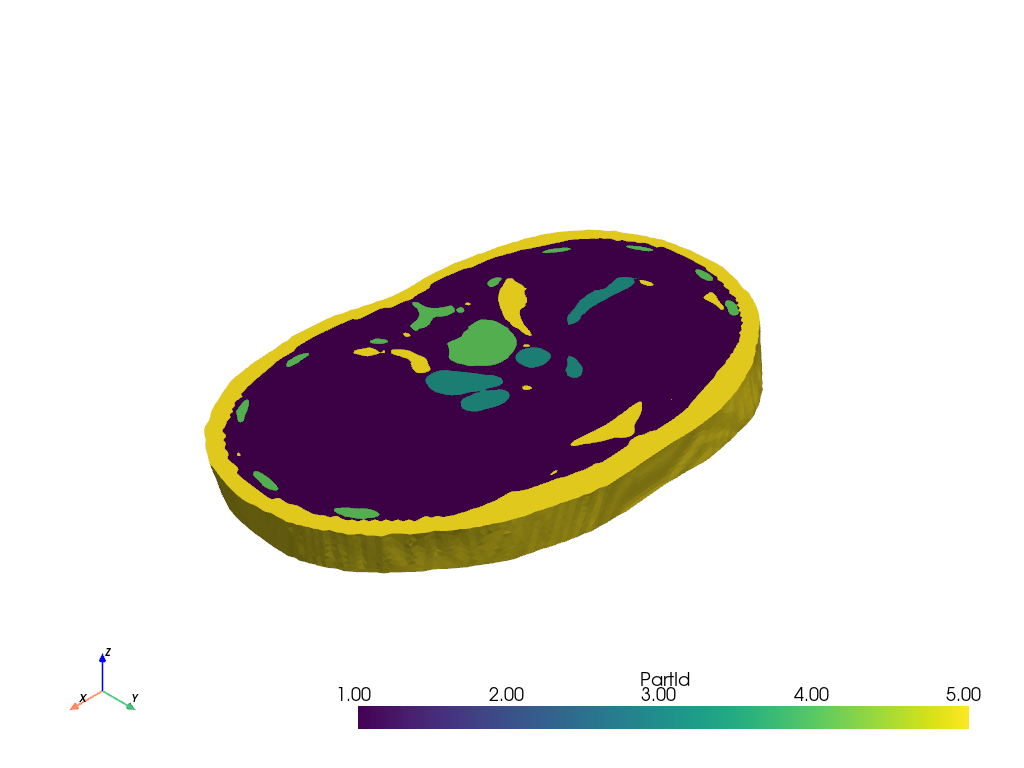

In [38]:
pv_mesh_clipped.plot()

In [39]:
x = np.linspace(xmin, xmax, 512)
y = np.linspace(ymin, ymax, 512)
xy = np.meshgrid(x, y)
xy = np.stack(xy, axis=-1)
xy = xy.reshape(-1,2)
z = np.ones_like(xy[:,0])*zmean
xy = np.concatenate([xy, z.reshape(-1,1)], axis=1)

In [40]:
pv_points = pv.StructuredGrid(xy)

In [41]:
interpolated = pv_points.sample(pv_mesh_clipped, categorical=False)

In [42]:
interpolated

StructuredGrid (0x28b030be0)
  N Cells:      0
  N Points:     262144
  X Bounds:     2.844e-03, 4.152e-01
  Y Bounds:     6.866e-02, 3.936e-01
  Z Bounds:     4.037e-01, 4.037e-01
  Dimensions:   0, 0, 0
  N Arrays:     5

In [43]:
points = interpolated.points.reshape(512,512,3)
values = interpolated['PartId'].reshape(512,512,1)

In [ ]:
np.unique(values)

pyvista_ndarray([0, 1, 3, 4, 5], dtype=uint8)

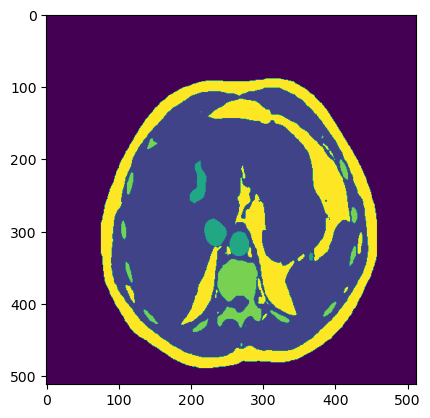

In [ ]:
plt.imshow(values)

/opt/homebrew/Caskroom/miniforge/base/envs/deep_eit/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


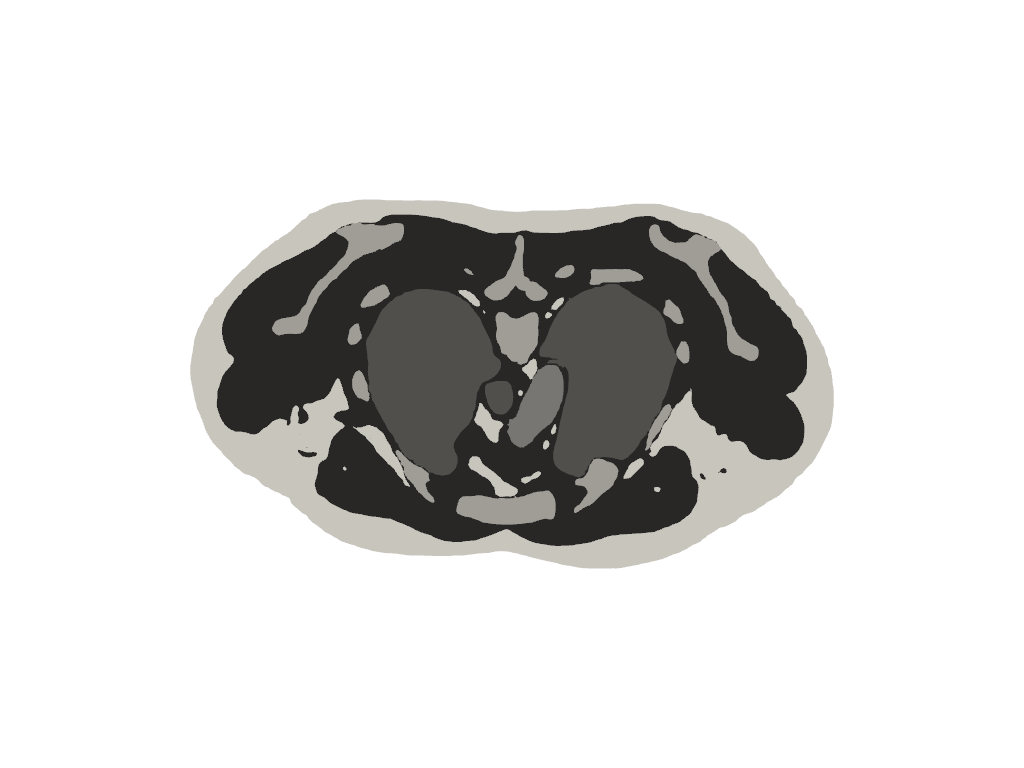

pyvista_ndarray([ 38,  39,  40,  51,  53,  54,  61,  63,  64,  68,  69,
                  70,  71,  72,  76,  79,  80,  85,  86,  89,  91,  95,
                  96, 100, 101, 102, 105, 107, 109, 111, 113, 114, 117,
                 118, 119, 120, 121, 124, 125, 127, 128, 132, 133, 134,
                 139, 140, 141, 146, 148, 151, 154, 156, 157, 160, 162,
                 163, 166, 167, 168, 171, 174, 176, 178, 180, 181, 188,
                 189, 191, 197, 200, 208, 213, 215, 225, 228, 229, 241,
                 242, 243, 255], dtype=uint8)

In [598]:
plotter = pv.Plotter()
# plotter.add_mesh(pv_mesh, scalars="colors", rgb=True, cmap=cmap, interpolate_before_map=True, categories=True)
plotter.add_mesh(interpolated, scalars="colors", rgb=True, cmap=cmap, interpolate_before_map=True, categories=True)
plotter.view_xy()
img = plotter.show(return_img=True)
np.unique(img)

In [600]:
example = pv.examples.load_uniform()

/opt/homebrew/Caskroom/miniforge/base/envs/deep_eit/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


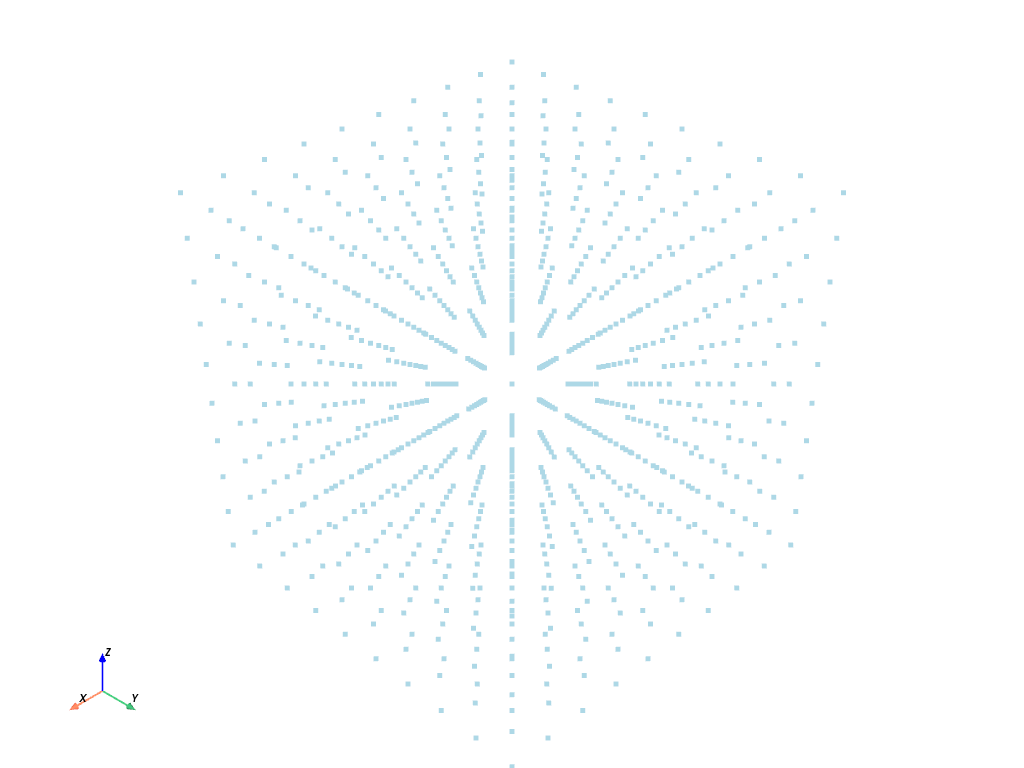

In [608]:
pv.PointSet(example.points).plot()

In [324]:
a = p.toimage(60)

In [326]:
np.unique(a.tonumpy())

array([  0,  14,  28,  42,  56,  69,  81,  94, 106, 119, 131, 143, 144,
       156], dtype=uint8)

In [323]:
a.shape

array([8000, 6000])

In [242]:
img = a[:,:]

TypeError: 'Image' object is not subscriptable

In [243]:
np.unique(img)

array([  0,  14,  27,  28,  39,  41,  42,  52,  53,  55,  56,  67,  69,
        74,  78,  80,  81,  92,  94, 103, 105, 106, 110, 117, 128, 129,
       131, 154, 156, 206], dtype=uint8)

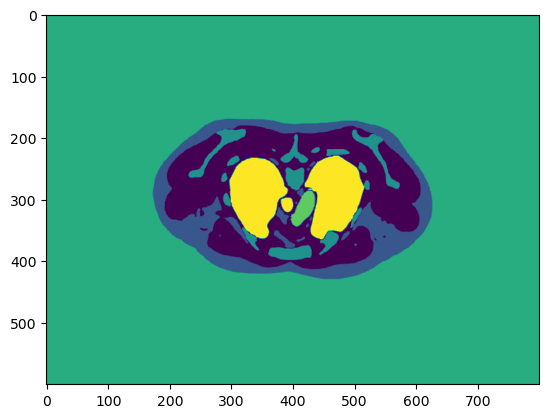

In [126]:
plt.imshow(img)

In [42]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

# Load the mesh from the .nas file
mesh = pv.read('/Users/dmnk/Documents/GitHub/KI_EIT/deep_eit/data/raw/case_15/labels/case_TCIA_200_0_final_mesh.nas')  # Replace 'your_mesh_file.nas' with the path to your .nas file

KeyboardInterrupt: 

In [39]:
# Define the z coordinate of the plane
z_coordinate = 0.3 # Replace with your desired z coordinate

# Extract a slice at the specified z-coordinate
slice_mesh = mesh.slice(normal=[0, 0, 1], origin=[0, 0, z_coordinate])

In [64]:
points = slice_mesh.points

In [90]:
faces = slice_mesh.faces
n_faces = np.array(slice_mesh.cell_data['nastran:ref']).shape[0]

In [91]:
n_faces

29956

In [98]:
new_faces = []
counter = 0
for _ in range(n_faces):
    if faces[counter] == 3:
        new_faces.append([faces[counter+1], faces[counter+2], faces[counter+3]])
        counter += 4
    elif faces[counter] == 4:
        new_faces.append([faces[counter+1], faces[counter+2], faces[counter+3], faces[counter+4]])
        counter += 5
    else:
        print('error')
    
        

In [401]:
plane_mesh = Mesh([points, new_faces])

In [100]:
slice_mesh.cell_data['nastran:ref'].shape

(29956,)

In [402]:
plane_mesh.celldata['c'] = slice_mesh.cell_data['nastran:ref']

In [403]:
plane_mesh.celldata['c']

array([1, 1, 1, ..., 5, 5, 5])

In [109]:
def plane_to_image(mesh, z_coord, resolution=[512, 512]):
    # plane = mesh.project_on_plane(plane='z')
    plane=mesh
    # Set up the rendering window with specified resolution
    resolution_x = resolution[0]
    resolution_y = resolution[1]

    # Create a renderer
    renderer = vtk.vtkRenderer()
    renderer.SetBackground(0, 0, 0)  # Set background to white

    # Create a render window
    render_window = vtk.vtkRenderWindow()
    render_window.AddRenderer(renderer)
    render_window.SetSize(resolution_x, resolution_y)

    # Create a render window interactor
    render_window_interactor = vtk.vtkRenderWindowInteractor()
    render_window_interactor.SetRenderWindow(render_window)

    # Add the plane to the renderer
    plane_mapper = vtk.vtkPolyDataMapper()
    plane_mapper.SetInputData(plane.polydata())
    plane_actor = vtk.vtkActor()
    plane_actor.SetMapper(plane_mapper)
    renderer.AddActor(plane_actor)

    # Initialize the render window interactor and render the scene
    render_window.Render()
    render_window_interactor.Initialize()

    # Render the window and read the pixel data
    window_to_image_filter = vtk.vtkWindowToImageFilter()
    window_to_image_filter.SetInput(render_window)
    window_to_image_filter.Update()
    vtk_image = window_to_image_filter.GetOutput()

    # Convert vtk image to NumPy array
    image_array = vtk_to_numpy(vtk_image.GetPointData().GetScalars()).reshape(resolution_y, resolution_x, -1)

    # # Convert the image array to grayscale
    # image_array_gray = np.mean(image_array, axis=2)

    # # Threshold the image array to create a binary image
    # binary_image = np.where(image_array_gray > 0, 1, 0)

    # # Flip the image array along the y-axis to match standard Cartesian coordinate system
    # binary_image_flipped = np.flipud(binary_image)

    # # Print the shape of the binary image
    # print("Shape of the binary image:", binary_image_flipped.shape)
    # return binary_image_flipped
    return image_array

In [121]:
from vedo import plotter

In [418]:
from matplotlib.colors import LinearSegmentedColormap

# Define the discrete values and corresponding grayscale values
values = [0, 1, 2, 3, 4, 5]
grayscale_values = np.linspace(0, 1, len(values))  # Grayscale values range from 0 to 1

# Create a colormap dictionary
colormap_dict = {}
for value, grayscale_value in zip(values, grayscale_values):
    colormap_dict[value] = grayscale_value

# Create a LinearSegmentedColormap object
cmap = LinearSegmentedColormap.from_list('custom_colormap', [(val, val, val) for val in grayscale_values], N=len(values))


In [419]:
cmap(plane_mesh.celldata['c'])

array([[0.2, 0.2, 0.2, 1. ],
       [0.2, 0.2, 0.2, 1. ],
       [0.2, 0.2, 0.2, 1. ],
       ...,
       [1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. ]])

In [435]:
colors = cmap(plane_mesh.celldata['c'])[:,:3]*255
colors = colors.astype(int)

In [436]:
colors

array([[ 51,  51,  51],
       [ 51,  51,  51],
       [ 51,  51,  51],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]])

In [437]:
plane_mesh.cellcolors[:, :3] = colors
plane_mesh.cellcolors[:, 3] = 1

In [438]:
plane_mesh.cellcolors

array([[ 51,  51,  51,   1],
       [ 51,  51,  51,   1],
       [ 51,  51,  51,   1],
       ...,
       [255, 255, 255,   1],
       [255, 255, 255,   1],
       [255, 255, 255,   1]], dtype=uint8)

In [439]:
new_colors = np.concatenate([colors, np.ones((colors.shape[0], 1))], axis=1)

In [443]:
pltt = plotter.Plotter(bg=None)
plane_mesh.cmap(cmap)
pltt.add(plane_mesh)
pltt.show()
img = pltt.screenshot(asarray=True, scale=1)

In [444]:
np.unique(img)

array([128], dtype=uint8)

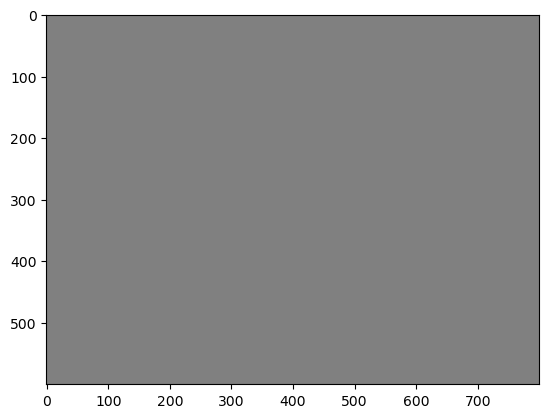

In [445]:
plt.imshow(img)

In [352]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray = r + g + b
    return gray

In [353]:
np.unique(rgb2gray(img))

array([ 0, 26, 43, 78], dtype=uint8)

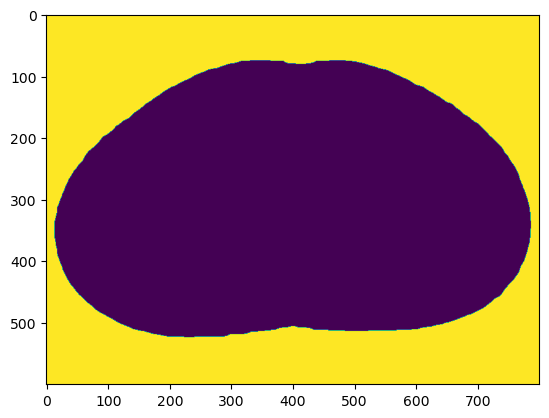

In [359]:
plt.imshow(rgb2gray(img)==0)

In [243]:
np.unique(slice_mesh.cell_data['nastran:ref'])

pyvista_ndarray([1, 3, 4, 5])

In [379]:
plane_mesh.celldata['c']

In [377]:
cmap([1,2])

array([[0.        , 0.50196078, 0.        , 1.        ],
       [1.        , 1.        , 0.        , 1.        ]])

# Compare generated targets with Anita's targets

In [12]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
toy = np.load('/work/deep_eit/data/processed/case_TCIA_53_0.npz', allow_pickle=True)

In [32]:
toy['targets'].shape

(16, 512, 512, 1)

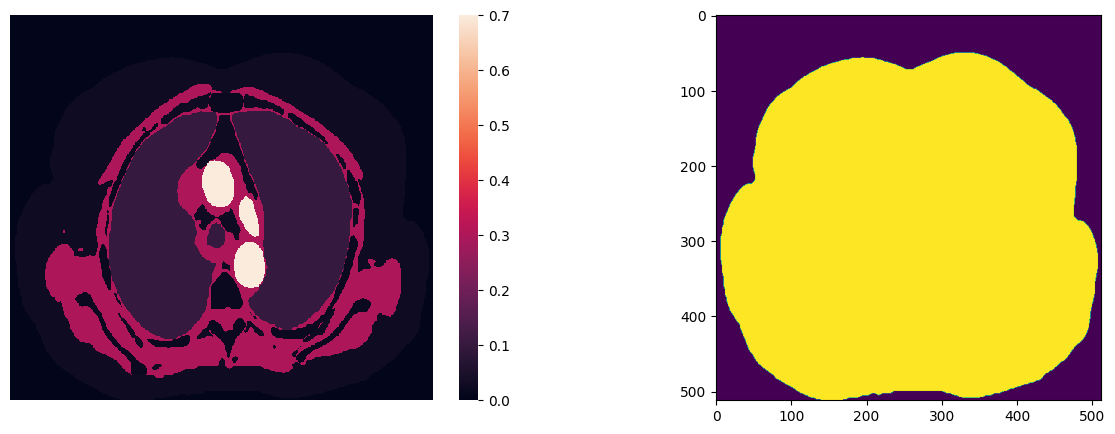

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(toy['targets'][0].squeeze(), ax=axes[0])
axes[0].axis('off')
axes[1].imshow(toy['masks'][0])

In [29]:
anita_target = sio.loadmat('/work/deep_eit/data/raw/case_TCIA_53_0/targets/level_1.mat')['slice_z1']
anita_target = np.where(np.isnan(anita_target), 0, anita_target)
anita_target = np.moveaxis(anita_target, 0, 1)

(0.0, 374.0, 259.0, 0.0)

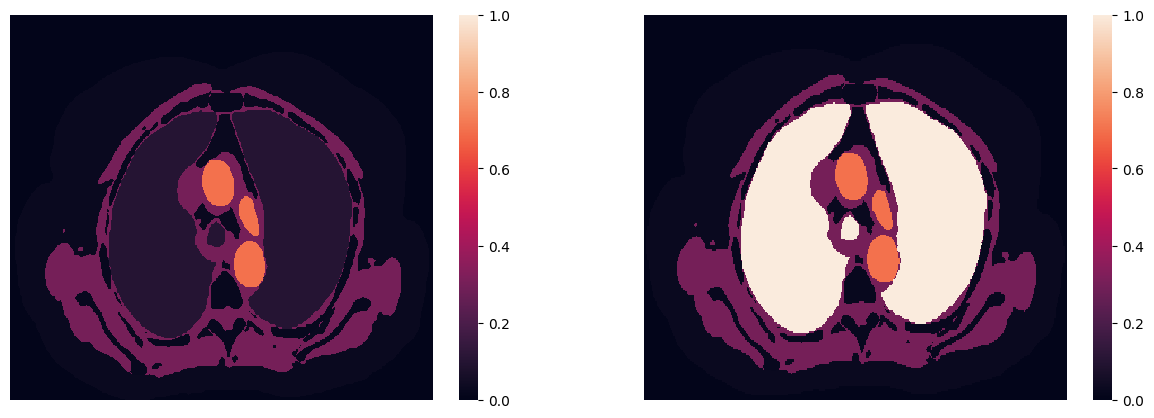

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(toy['targets'][0].squeeze(), ax=axes[0], vmax=1)
axes[0].axis('off')
sns.heatmap(anita_target, ax=axes[1], vmax=1)
axes[1].axis('off')


In [35]:
anita_target.shape

(259, 374)

In [25]:
np.unique(anita_target)

array([0.   , 0.02 , 0.025, 0.3  , 0.7  , 1.   ])

In [1]:
import os


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
case_flip = np.load('/home/nibdombe/deep_eit/data/processed/case_TCIA_196_0.npz')
case_correct = np.load('/home/nibdombe/deep_eit/data/processed/case_TCIA_2_0.npz')

In [8]:
img_flip = case_flip['targets'][8]
img_correct = case_correct['targets'][5]

In [13]:
img_flip_flip = np.flip(img_flip, axis=0)
img_flip_flip_flip = np.flip(img_flip_flip, axis=1)

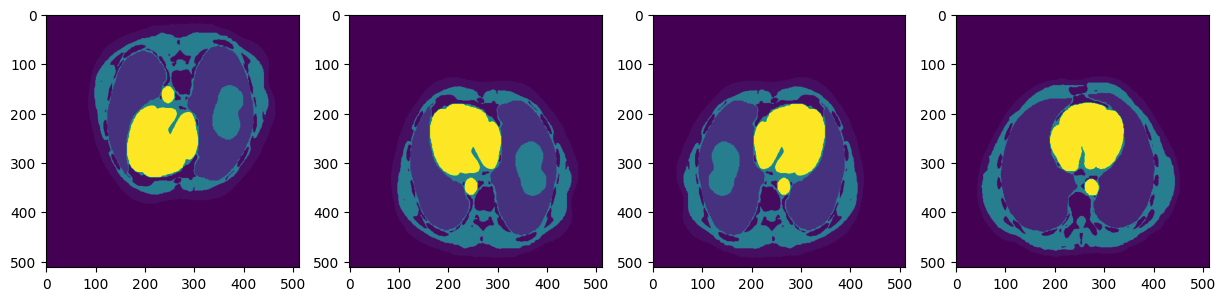

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img_flip.squeeze())
axes[1].imshow(img_flip_flip.squeeze())
axes[2].imshow(img_flip_flip_flip.squeeze())
axes[3].imshow(img_correct.squeeze())

In [20]:
cv2.resize(masks[0].squeeze(), (128, 128), interpolation=cv2.INTER_NEAREST).shape

(128, 128)

In [17]:
masks[0].shape

(512, 512, 1)